In [18]:
!pip install mmcv-full

     |████████████████████████████████| 324 kB 12.3 MB/s 
     |████████████████████████████████| 185 kB 39.6 MB/s 
  Created wheel for mmcv-full: filename=mmcv_full-1.3.14-cp37-cp37m-linux_x86_64.whl size=31304473 sha256=55c7f65a4c15e60306265939ce3632d99ea282d8873cf9804b318e07081e68bd
  Stored in directory: /root/.cache/pip/wheels/5e/54/62/69c99dc3c9937bca64126f81cbe315ae6c8e6e98c43fa7392d
Successfully built mmcv-full


In [ ]:
!git clone https://github.com/open-mmlab/mmdetection.git
%cd mmdetection
!python setup.py install
!mkdir checkpoints
!wget -O /content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth

In [1]:
!wget https://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
!wget https://www.robots.ox.ac.uk/~vgg/data/pets/data/annotations.tar.gz

--2021-09-30 05:01:21--  https://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 791918971 (755M) [application/x-gzip]
Saving to: ‘images.tar.gz’

images.tar.gz       100%[===================>] 755.23M  71.6MB/s    in 11s     

2021-09-30 05:01:32 (68.8 MB/s) - ‘images.tar.gz’ saved [791918971/791918971]

--2021-09-30 05:01:32--  https://www.robots.ox.ac.uk/~vgg/data/pets/data/annotations.tar.gz
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19173078 (18M) [application/x-gzip]
Saving to: ‘annotations.tar.gz’

annotations.tar.gz  100%[===================>]  18.28M  60.7MB/s    in 0.3s    

2021-09-30 05:01:32 (60.7 M

In [2]:
!nvidia-smi

Thu Sep 30 05:01:32 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.63.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P8    30W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
!mkdir /content/data

In [4]:
!tar -xvf images.tar.gz -C /content/data/
!tar -xvf annotations.tar.gz -C /content/data/

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
annotations/trimaps/._pomeranian_180.png
annotations/trimaps/pomeranian_180.png
annotations/trimaps/._pomeranian_181.png
annotations/trimaps/pomeranian_181.png
annotations/trimaps/._pomeranian_182.png
annotations/trimaps/pomeranian_182.png
annotations/trimaps/._pomeranian_183.png
annotations/trimaps/pomeranian_183.png
annotations/trimaps/._pomeranian_184.png
annotations/trimaps/pomeranian_184.png
annotations/trimaps/._pomeranian_185.png
annotations/trimaps/pomeranian_185.png
annotations/trimaps/._pomeranian_186.png
annotations/trimaps/pomeranian_186.png
annotations/trimaps/._pomeranian_187.png
annotations/trimaps/pomeranian_187.png
annotations/trimaps/._pomeranian_188.png
annotations/trimaps/pomeranian_188.png
annotations/trimaps/._pomeranian_189.png
annotations/trimaps/pomeranian_189.png
annotations/trimaps/._pomeranian_19.png
annotations/trimaps/pomeranian_19.png
annotations/trimaps/._pomeranian_190.png
annotations/trimaps/pomeranian_190.png
annota

* 각 이미지에는 size, object(name 등등), bnd_box 가 있다. xml로 존재함.
* 문제는 classname 이 cat으로만 나와서 filename에서 불러와야할듯

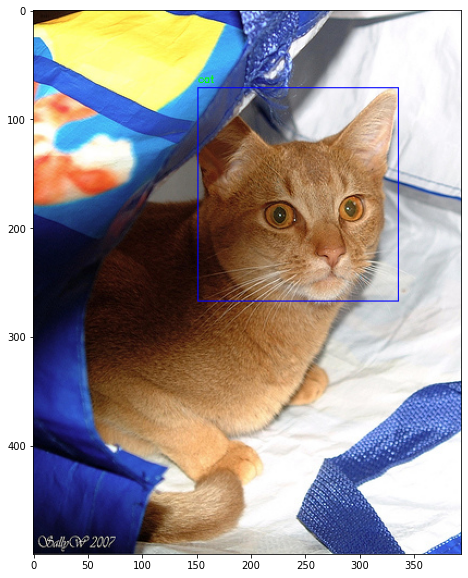

In [48]:
import xml.etree.ElementTree as ET
import os
import copy
import cv2
import matplotlib.pyplot as plt
xml_file = '/content/data/annotations/xmls/Abyssinian_100.xml'
tree = ET.parse(xml_file) #파일 읽기
root = tree.getroot() #최상단 태그가 현 위치다.
img_dir = '/content/data/images/'


img_name = root.find('filename').text #해당 태그 행 가져오기
img_size = root.find('size')
img_width = int(img_size.find('width').text)
img_height = int(img_size.find('height').text)

objects = root.findall('object') # 해당 이미지는 비행기와 사람 등 4개의 객체를 분류
object_list = []

img_full_path = os.path.join(img_dir, img_name)
img = cv2.imread(img_full_path)
dst = img.copy()

for obj in objects:
  box = obj.find('bndbox')
  x1 = int(box.find('xmin').text)
  y1 = int(box.find('ymin').text)
  x2 = int(box.find('xmax').text)
  y2 = int(box.find('ymax').text)

  bndbox_coor = [x1, y1, x2, y2]
  class_name = obj.find('name').text

  cv2.rectangle(dst, (x1, y1), (x2, y2), color=(255, 1, 1), thickness=1)
  cv2.putText(dst, class_name, (x1, y1-5), cv2.FONT_HERSHEY_SIMPLEX, color=(0, 255, 0), thickness=1, fontScale=0.3)

  object_dict = {'calss_name' : class_name, 'bndbox_coor' : bndbox_coor}
  object_list.append(object_dict)

plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))

In [49]:
import pandas as pd
pet_df = pd.read_csv('./data/annotations/trainval.txt', sep=' ', header=None, names=['image_name', 'class_id', 'dummy1', 'dummy2'])
pet_df #dummy1, 2는 일단 쓸모 없는 데이터

,image_name,class_id,dummy1,dummy2
0,Abyssinian_100,1,1,1
1,Abyssinian_101,1,1,1
2,Abyssinian_102,1,1,1
3,Abyssinian_103,1,1,1
4,Abyssinian_104,1,1,1
...,...,...,...,...
3675,yorkshire_terrier_187,37,2,25
3676,yorkshire_terrier_188,37,2,25
3677,yorkshire_terrier_189,37,2,25
3678,yorkshire_terrier_18,37,2,25


In [50]:
#for index, i in enumerate(pet_df.image_name.values):
#  i = i[:i.rfind('_')]
#  #print(i)
#  pet_df['image_name'][index] = i

# 또는

pet_df['class_name'] = pet_df['image_name'].apply(lambda x : x[:x.rfind('_')])
pet_df

,image_name,class_id,dummy1,dummy2,class_name
0,Abyssinian_100,1,1,1,Abyssinian
1,Abyssinian_101,1,1,1,Abyssinian
2,Abyssinian_102,1,1,1,Abyssinian
3,Abyssinian_103,1,1,1,Abyssinian
4,Abyssinian_104,1,1,1,Abyssinian
...,...,...,...,...,...
3675,yorkshire_terrier_187,37,2,25,yorkshire_terrier
3676,yorkshire_terrier_188,37,2,25,yorkshire_terrier
3677,yorkshire_terrier_189,37,2,25,yorkshire_terrier
3678,yorkshire_terrier_18,37,2,25,yorkshire_terrier


In [51]:
from sklearn.model_selection import train_test_split

In [52]:
train_df, val_df = train_test_split(pet_df, test_size=0.1, stratify=pet_df['class_id'], random_state=42)

In [53]:
val_df #sort하지 않으면 마구잡이로 섞여있다.

,image_name,class_id,dummy1,dummy2,class_name
1992,american_pit_bull_terrier_188,3,2,2,american_pit_bull_terrier
187,basset_hound_134,4,2,3,basset_hound
984,leonberger_135,20,2,14,leonberger
928,keeshond_12,19,2,13,keeshond
2413,Egyptian_Mau_170,12,1,6,Egyptian_Mau
...,...,...,...,...,...
1829,yorkshire_terrier_130,37,2,25,yorkshire_terrier
3315,samoyed_177,30,2,20,samoyed
1867,Abyssinian_168,1,1,1,Abyssinian
2396,Egyptian_Mau_150,12,1,6,Egyptian_Mau


In [54]:
train_df = train_df.sort_values(by='image_name')
val_df = val_df.sort_values(by='image_name')

In [55]:
train_df['image_name'].to_csv('./data/train.txt', sep=' ', header=False, index=False)
val_df['image_name'].to_csv('./data/val.txt', sep=' ', header=False, index=False)

In [56]:
pet_classes = pet_df['class_name'].unique().tolist()

In [ ]:
ls ./data/images

In [66]:
def get_bboxes(annor_dir, xml_file):
  annor_xml_file = annor_dir
  tree = ET.parse(annor_xml_file)
  root = tree.getroot()

  objects = root.findall('object') # 해당 이미지는 비행기와 사람 등 4개의 객체를 분류
  object_list = []
  bbox_names = [] #이름
  bboxes = [] #경로

  for obj in objects:

    bbox_name = xml_file[:xml_file.rfind('_')]

    box = obj.find('bndbox')
    x1 = int(box.find('xmin').text)
    y1 = int(box.find('ymin').text)
    x2 = int(box.find('xmax').text)
    y2 = int(box.find('ymax').text)

    bbox_names.append(bbox_name)
    bboxes.append([x1, y1, x2, y2])
  return bbox_names, bboxes

In [83]:
import copy
import os.path as osp

import mmcv
import numpy as np

from mmdet.datasets.builder import DATASETS
from mmdet.datasets.custom import CustomDataset

@DATASETS.register_module(force=True)
class PetDataset(CustomDataset):
    pet_classes = pet_df['class_name'].unique().tolist()
    CLASSES = pet_classes
    
    ### self.ann_file : /content/data/train.txt
    ### self.img_prefix : /content/data/images
    ### ann_file : /content/data/train.txt

    def load_annotations(self, ann_file):
        print("self.ann_file : ", self.ann_file)
        print("self.img_prefix: ", self.img_prefix)

        cat2label = {k: i for i, k in enumerate(self.CLASSES)}
        # load image list from file
        image_list = mmcv.list_from_file(self.ann_file)
    
        data_infos = []
        # convert annotations to middle format
        for image_id in image_list:
            filename = f'{self.img_prefix}/{image_id}.jpg'
            image = mmcv.imread(filename)
            height, width = image.shape[:2]
    
            data_info = dict(filename=f'{image_id}.jpg', width=width, height=height)

            # load annotations
            label_prefix = self.img_prefix.replace('images', 'annotations')
            anno_xml_file = os.path.join(label_prefix, 'xmls/' + str(image_id) + '.xml')

            if not os.path.exists(anno_xml_file):
              continue

            anno_xml_dir = os.path.join(label_prefix, 'xmls')
            bbox_names, bboxes = get_bboxes(anno_xml_file, str(image_id) + '.xml')


            #lines = mmcv.list_from_file(osp.join(label_prefix, f'{image_id}.txt'))xml을 사용하기에 해당코드를 사용하지 못함
    
            #content = [line.strip().split(' ') for line in lines]
            #bbox_names = [x[0] for x in content]
            #bboxes = [[float(info) for info in x[4:8]] for x in content]
    
            gt_bboxes = []
            gt_labels = []
            gt_bboxes_ignore = []
            gt_labels_ignore = []
    
            # filter 'DontCare'
            for bbox_name, bbox in zip(bbox_names, bboxes):
                if bbox_name in cat2label:
                    gt_labels.append(cat2label[bbox_name])
                    gt_bboxes.append(bbox)
                else:
                    gt_labels_ignore.append(-1)
                    gt_bboxes_ignore.append(bbox)

            data_anno = dict(
                bboxes=np.array(gt_bboxes, dtype=np.float32).reshape(-1, 4),
                labels=np.array(gt_labels, dtype=np.long),
                bboxes_ignore=np.array(gt_bboxes_ignore,
                                       dtype=np.float32).reshape(-1, 4),
                labels_ignore=np.array(gt_labels_ignore, dtype=np.long))

            data_info.update(ann=data_anno)
            data_infos.append(data_info)

        return data_infos

In [84]:
config_file = '/content/mmdetection/configs/faster_rcnn/faster_rcnn_r50_fpn_1x_coco.py'
checkpoint_file = '/content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'

In [85]:
from mmcv import Config
cfg = Config.fromfile(config_file)

In [86]:
print(cfg.pretty_text) #모델, 데이터셋 보유 oxford 데이터로 바꾸면 됌

model = dict(
    type='FasterRCNN',
    backbone=dict(
        type='ResNet',
        depth=50,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        frozen_stages=1,
        norm_cfg=dict(type='BN', requires_grad=True),
        norm_eval=True,
        style='pytorch',
        init_cfg=dict(type='Pretrained', checkpoint='torchvision://resnet50')),
    neck=dict(
        type='FPN',
        in_channels=[256, 512, 1024, 2048],
        out_channels=256,
        num_outs=5),
    rpn_head=dict(
        type='RPNHead',
        in_channels=256,
        feat_channels=256,
        anchor_generator=dict(
            type='AnchorGenerator',
            scales=[8],
            ratios=[0.5, 1.0, 2.0],
            strides=[4, 8, 16, 32, 64]),
        bbox_coder=dict(
            type='DeltaXYWHBBoxCoder',
            target_means=[0.0, 0.0, 0.0, 0.0],
            target_stds=[1.0, 1.0, 1.0, 1.0]),
        loss_cls=dict(
            type='CrossEntropyLoss', use_sigmoid=True, loss_weight=1.

In [87]:
from mmdet.apis import set_random_seed

# Modify dataset type and path
cfg.dataset_type = 'PetDataset'
cfg.data_root = '/content/data/'

cfg.data.test.type = 'PetDataset'
cfg.data.test.data_root = '/content/data/'
cfg.data.test.ann_file = 'train.txt'
cfg.data.test.img_prefix = 'images'

cfg.data.train.type = 'PetDataset'
cfg.data.train.data_root = '/content/data/'
cfg.data.train.ann_file = 'train.txt'
cfg.data.train.img_prefix = 'images'

cfg.data.val.type = 'PetDataset'
cfg.data.val.data_root = '/content/data/'
cfg.data.val.ann_file = 'val.txt'
cfg.data.val.img_prefix = 'images'

# modify num classes of the model in box head
cfg.model.roi_head.bbox_head.num_classes = 37 #classes 개수에 따라서 바꿔야함
# We can still use the pre-trained Mask RCNN model though we do not need to
# use the mask branch
cfg.load_from = 'checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'

# Set up working dir to save files and logs.
cfg.work_dir = './tutorial_exps'

# The original learning rate (LR) is set for 8-GPU training.
# We divide it by 8 since we only use one GPU.
cfg.optimizer.lr = 0.02 / 8
cfg.lr_config.warmup = None
cfg.log_config.interval = 5


cfg.runner.max_epochs = 5

cfg.data.samples_prt_gpu = 4

cfg.lr_config.policy = 'step'

# Change the evaluation metric since we use customized dataset.
cfg.evaluation.metric = 'mAP'
# We can set the evaluation interval to reduce the evaluation times
cfg.evaluation.interval = 5 #12번때마다 evaluation가 고정이라 에폭과 같은 5로 바꿈
# We can set the checkpoint saving interval to reduce the storage cost
cfg.checkpoint_config.interval = 5 # 5번마다 저장 에폭이 5라 바꿈

# Set seed thus the results are more reproducible
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpu_ids = range(1)


# We can initialize the logger for training and have a look
# at the final config used for training
print(f'Config:\n{cfg.pretty_text}')

Config:
model = dict(
    type='FasterRCNN',
    backbone=dict(
        type='ResNet',
        depth=50,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        frozen_stages=1,
        norm_cfg=dict(type='BN', requires_grad=True),
        norm_eval=True,
        style='pytorch',
        init_cfg=dict(type='Pretrained', checkpoint='torchvision://resnet50')),
    neck=dict(
        type='FPN',
        in_channels=[256, 512, 1024, 2048],
        out_channels=256,
        num_outs=5),
    rpn_head=dict(
        type='RPNHead',
        in_channels=256,
        feat_channels=256,
        anchor_generator=dict(
            type='AnchorGenerator',
            scales=[8],
            ratios=[0.5, 1.0, 2.0],
            strides=[4, 8, 16, 32, 64]),
        bbox_coder=dict(
            type='DeltaXYWHBBoxCoder',
            target_means=[0.0, 0.0, 0.0, 0.0],
            target_stds=[1.0, 1.0, 1.0, 1.0]),
        loss_cls=dict(
            type='CrossEntropyLoss', use_sigmoid=True, loss_w

In [88]:
from mmdet.datasets import build_dataset
from mmdet.models import build_detector
from mmdet.apis import train_detector

In [89]:
#train용 데이터 셋 생성
datasets = [build_dataset(cfg.data.train)]

self.ann_file :  /content/data/train.txt
self.img_prefix:  /content/data/images


/usr/local/lib/python3.7/dist-packages/mmdet-2.17.0-py3.7.egg/mmdet/datasets/custom.py:157: UserWarning: CustomDataset does not support filtering empty gt images.
  'CustomDataset does not support filtering empty gt images.')


In [90]:
datasets

[
 PetDataset Train dataset with number of images 3303, and instance counts: 
 +-----------------------+-------+-------------------------+-------+-------------------------------+-------+---------------------+-------+---------------------------------+-------+
 | category              | count | category                | count | category                      | count | category            | count | category                        | count |
 +-----------------------+-------+-------------------------+-------+-------------------------------+-------+---------------------+-------+---------------------------------+-------+
 | 0 [Abyssinian]        | 89    | 1 [american_bulldog]    | 90    | 2 [american_pit_bull_terrier] | 90    | 3 [basset_hound]    | 90    | 4 [beagle]                      | 90    |
 | 5 [Bengal]            | 89    | 6 [Birman]              | 90    | 7 [Bombay]                    | 87    | 8 [boxer]           | 90    | 9 [British_Shorthair]           | 90    |
 | 10 [chihuahua]

In [91]:
model = build_detector(cfg.model, train_cfg=cfg.get('train_cfg'), test_cfg=cfg.get('test_cfg') )
model.CLASSES = datasets[0].CLASSES

/usr/local/lib/python3.7/dist-packages/mmdet-2.17.0-py3.7.egg/mmdet/core/anchor/builder.py:17: UserWarning: ``build_anchor_generator`` would be deprecated soon, please use ``build_prior_generator`` 
  '``build_anchor_generator`` would be deprecated soon, please use '


In [ ]:
%cd mmdetection
mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))
train_detector(model, datasets, cfg, distributed=False, validate=True)

/content/mmdetection
self.ann_file :  /content/data/val.txt
self.img_prefix:  /content/data/images


2021-09-30 06:08:41,337 - mmdet - INFO - load checkpoint from checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth
2021-09-30 06:08:41,340 - mmdet - INFO - Use load_from_local loader
2021-09-30 06:08:41,491 - mmdet - WARNING - The model and loaded state dict do not match exactly

size mismatch for roi_head.bbox_head.fc_cls.weight: copying a param with shape torch.Size([81, 1024]) from checkpoint, the shape in current model is torch.Size([38, 1024]).
size mismatch for roi_head.bbox_head.fc_cls.bias: copying a param with shape torch.Size([81]) from checkpoint, the shape in current model is torch.Size([38]).
size mismatch for roi_head.bbox_head.fc_reg.weight: copying a param with shape torch.Size([320, 1024]) from checkpoint, the shape in current model is torch.Size([148, 1024]).
size mismatch for roi_head.bbox_head.fc_reg.bias: copying a param with shape torch.Size([320]) from checkpoint, the shape in current model is torch.Size([148]).
2021-09-30 06:08:41,497 - mmdet - INFO - S